Piyakorn Mona Munegan

Kaggle user name: Mona Munegan https://www.kaggle.com/piyakornmunegan

A code stub for accessing the dataset:

In [ ]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/drive/')

image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral', 'OTHER']
dataset_directory = '/content/drive/My Drive/COMP8220/Project/data/facial-expression-recognition-ood/'  ## CHANGE TO YOUR OWN DIRECTORY



In [ ]:
images_train = np.load(join(dataset_directory, 'Training_data_images.npy'))
labels_train = np.load(join(dataset_directory, 'Training_data_labels.npy'))
m_images_train = np.load(join(dataset_directory, 'MNIST_dev_data_images.npy')) #MNIST
m_labels_train = np.load(join(dataset_directory, 'MNIST_dev_data_labels.npy')) #MNIST

#PublicTest set
images_test_public = np.load(join(dataset_directory, 'PublicTest_faces_plus_data_images.npy'))  ## CHANGE TO APPROPRIATE PUBLIC TEST FILE

images_train = images_train.reshape([-1, image_size, image_size])
images_test_public = images_test_public.reshape([-1, image_size, image_size])   
m_images_train = m_images_train.reshape([-1, image_size, image_size]) #MNIST

#Reshape MNIST lable
m_labels_train_T = m_labels_train.T #Transpose 
flat_m_labels = m_labels_train_T.flatten() #Flatten 2d numpy array into 1d array

#Concat face and MNIST image train
images_train_plus_m = np.concatenate((images_train, m_images_train), axis=0)

In [ ]:
print(labels_train)
print(m_labels_train)
print(m_labels_train_T)
print(flat_m_labels)

[0 6 3 ... 0 5 0]
[[3]
 [9]
 [5]
 ...
 [5]
 [2]
 [0]]
[[3 9 5 ... 5 2 0]]
[3 9 5 ... 5 2 0]


In [ ]:
m_labels = flat_m_labels.copy()
for i in range(len(m_labels)):
    m_labels[i] = 7
m_labels

array([7, 7, 7, ..., 7, 7, 7])

In [ ]:
valuesf, countsf = np.unique(labels_train, return_counts=True)
print("Face Uniqueue Lable: %s count %s" % (valuesf, countsf))
valuesm, countsm = np.unique(flat_m_labels, return_counts=True)
print("Original MNIST Uniqueue Lable: %s count %s" % (valuesm, countsm))

values, counts = np.unique(m_labels, return_counts=True)
print("Modified MNIST Uniqueue Lable: %s count %s" % (values, counts))

Face Uniqueue Lable: [0 1 2 3 4 5 6] count [1266  211 1107 2736 1043 1052 1913]
Original MNIST Uniqueue Lable: [0 1 2 3 4 5 6 7 8 9] count [141 154 146 141 162 141 155 172 133 155]
Modified MNIST Uniqueue Lable: [7] count [1500]


In [ ]:
#Concat face and MNIST labels train
labels_train_plus_m = np.concatenate((labels_train, m_labels), axis=0)

In [ ]:
values, counts = np.unique(labels_train_plus_m, return_counts=True)
print("Face Plus MNIST Uniqueue Lable: %s count %s" % (values, counts))
print(labels_train_plus_m)

Face Plus MNIST Uniqueue Lable: [0 1 2 3 4 5 6 7] count [1266  211 1107 2736 1043 1052 1913 1500]
[0 6 3 ... 7 7 7]


In [ ]:
print(images_train.shape)
print(labels_train.shape)
print(images_test_public.shape)
print(m_images_train.shape)
print(m_labels.shape)
print(images_train_plus_m.shape)
print(labels_train_plus_m.shape)
print(f'Dataset has {images_train.shape[1]*images_train.shape[2]} features')

(9328, 48, 48)
(9328,)
(1636, 48, 48)
(1500, 48, 48)
(1500,)
(10828, 48, 48)
(10828,)
Dataset has 2304 features


7


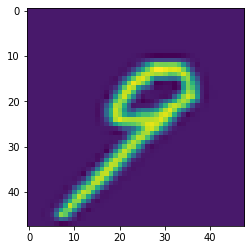

In [ ]:
sample = 1
print(m_labels[sample])
plt.imshow(m_images_train[sample], cmap='gray')

7
7
OTHER


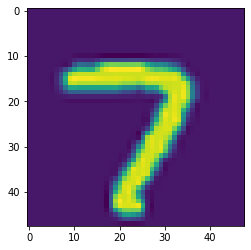

In [ ]:
sample = 9350
print(labels_train_plus_m[sample])
print(labels_train_plus_m[sample])
print(EMOTIONS[labels_train_plus_m[sample]])
plt.imshow(images_train_plus_m[sample], cmap='gray')

[[0.77647059 0.77647059 0.77647059 ... 0.78039216 0.78039216 0.78431373]
 [0.         0.         0.         ... 0.07843137 0.06666667 0.78039216]
 [0.00392157 0.         0.         ... 0.09019608 0.08627451 0.78039216]
 ...
 [0.         0.         0.         ... 0.1254902  0.10196078 0.78039216]
 [0.         0.         0.         ... 0.12156863 0.10196078 0.78039216]
 [0.         0.         0.         ... 0.11372549 0.10196078 0.78039216]]
6
neutral


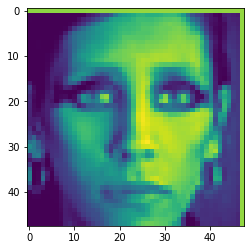

In [ ]:
sample = 1
print(images_train_plus_m[sample])
print(labels_train_plus_m[sample])
print(EMOTIONS[labels_train[sample]])
plt.imshow(images_train_plus_m[sample], cmap='gray')

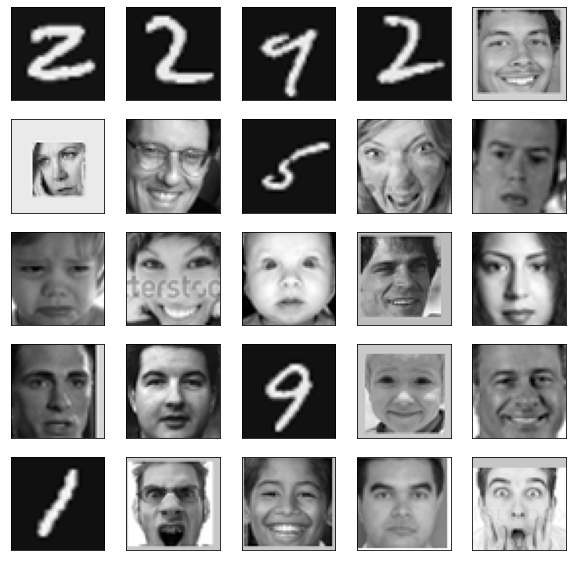

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_public[i], cmap='gray')
    #plt.xlabel( EMOTIONS[ labels_train[i] ] )
plt.show()

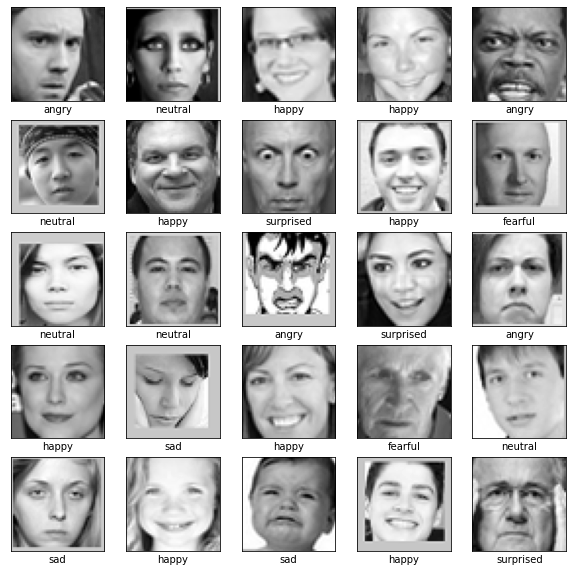

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap='gray')
    plt.xlabel( EMOTIONS [ labels_train[i] ] )
plt.show()

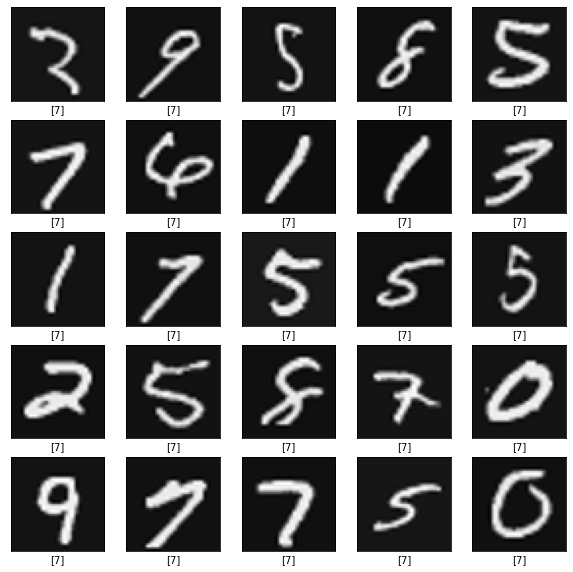

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(m_images_train[i], cmap='gray')
    plt.xlabel([m_labels[i]] )
plt.show()

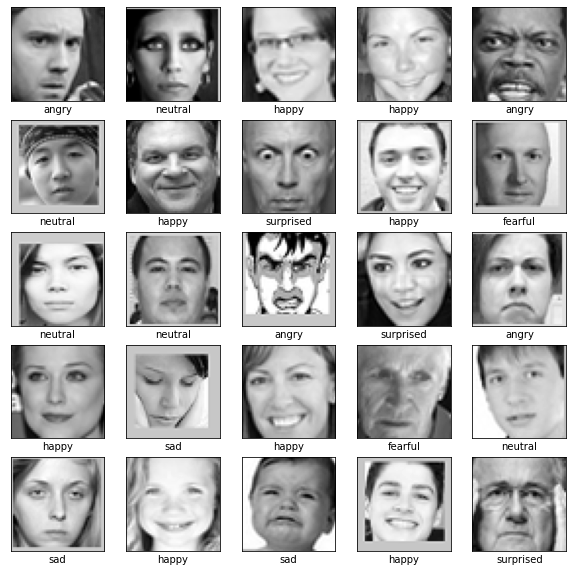

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train_plus_m[i], cmap='gray')
    plt.xlabel(EMOTIONS[labels_train_plus_m[i]] )
plt.show()

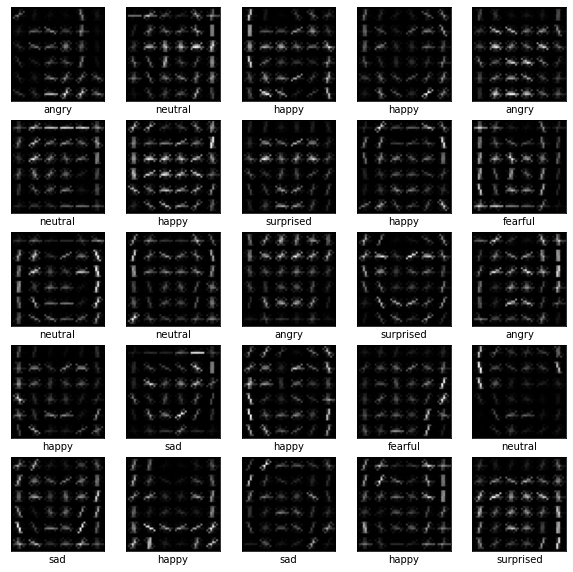

HOG feature vector con 900 features


In [ ]:
#Hog image 
#https://github.com/isaacarroyov/fer_without_ann/blob/main/notebooks/fer_without_ann.ipynb
from skimage.feature import hog
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    hog_feature_vector, hog_image = hog(images_train[i], 
                                    orientations=9, 
                                    pixels_per_cell=(8,8), 
                                    cells_per_block=(2,2),
                                    visualize=True, # True if you want the HOG image, default value is False
                                      )
    plt.imshow(hog_image, cmap='gray')
    plt.xlabel( EMOTIONS[ labels_train[i] ] )
plt.show()

print(f"HOG feature vector con {len(hog_feature_vector)} features")

In [ ]:
X = images_train_plus_m.reshape((10828, -1))
#X[:1]
y = labels_train_plus_m
print(X.shape)
print(y.shape)

(10828, 2304)
(10828,)


In [ ]:
X[1]

array([0.77647059, 0.77647059, 0.77647059, ..., 0.11372549, 0.10196078,
       0.78039216])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7579, 2304)
(3249, 2304)
(7579,)
(3249,)


In [ ]:
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

In [ ]:
#Initail SVC model
start = time.time()
pipe = Pipeline(steps = [
    ('pca', PCA(n_components=0.90)), 
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1))
    ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Time:", time.time()-start)
print("Accuracy:", accuracy_score(y_test, y_pred))

Time: 42.70932483673096
Accuracy: 0.3567251461988304


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
# Declare grid of hyper-parameters
hyperparams = dict(svm__gamma=[0.001, 0.01, 0.1], svm__C = [1, 10, 100, 1_000])

model = Pipeline(steps= [
    ('pca', PCA(n_components=0.9)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
    ])

# Cross Validation for GridSearchCV
crossVal = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator= model, # Model
    cv= crossVal, # Cross Validation
    param_grid= hyperparams, # hyper-parameters
    n_jobs=-1, # Use all CPU's
    verbose= 10 # Info
)

In [ ]:
start = time.time()
grid_search.fit(X_train,y_train)
print("Time:", time.time()-start)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Time: 1344.8109908103943


In [ ]:
# Best params
gamma_ = grid_search.best_params_['svm__gamma']
C_ = grid_search.best_params_['svm__C']

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=0.9)), ('scaler', StandardScaler()),
                ('svm', SVC(C=10, gamma=0.01))])

In [ ]:
start = time.time()
pipe = Pipeline(steps = [
    ('pca', PCA(n_components=0.90)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=C_, gamma=gamma_))
    ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Time:", time.time()-start)
print("Accuracy:", accuracy_score(y_test, y_pred))
#Confusion Matrix
conf1 = confusion_matrix(y_test ,y_pred)
print(conf1)
report1 = classification_report(y_test ,y_pred)
print(report1)
#lable = ['0:angry', '1:disgusted', '2:fearful','3:happy', '4:sad', '5:surprised', '6:neutral', '7:OTHER']

Time: 36.44369673728943
Accuracy: 0.5903354878424131
[[145   4  37  40  36  16  63   2]
 [ 16  20   5  10   6   1  11   0]
 [ 43   0 120  53  32  40  49   1]
 [ 39   0  40 642  29  21  77   0]
 [ 53   1  29  47  67  10  93   3]
 [ 17   3  22  41  16 179  26   0]
 [ 61   0  41 100  74  23 295   0]
 [  0   0   0   0   0   0   0 450]]
              precision    recall  f1-score   support

           0       0.39      0.42      0.40       343
           1       0.71      0.29      0.41        69
           2       0.41      0.36      0.38       338
           3       0.69      0.76      0.72       848
           4       0.26      0.22      0.24       303
           5       0.62      0.59      0.60       304
           6       0.48      0.50      0.49       594
           7       0.99      1.00      0.99       450

    accuracy                           0.59      3249
   macro avg       0.57      0.52      0.53      3249
weighted avg       0.58      0.59      0.58      3249



##Histograms of Oriented Gradients (HOG)


In [ ]:
#Code for HOG Descriptor class https://github.com/isaacarroyov/fer_without_ann/blob/main/notebooks/OwnTransformers/ImageDescriptors.py

from sklearn.base import BaseEstimator, TransformerMixin

class DescriptorHOG(BaseEstimator, TransformerMixin):
    def __init__(self, hog_orientations = 9, hog_pixels_per_cell = (8,8), hog_cells_per_block=(2,2), hog_block_norm = 'L2', img_dim=(48,48)):
        self.hog_orientations = hog_orientations
        self.hog_pixels_per_cell = hog_pixels_per_cell
        self.hog_cells_per_block = hog_cells_per_block
        self.hog_block_norm = hog_block_norm
        self.img_dim = img_dim

    def fit(self, X, y=None):
        return self

    def feature_hog(self, arr):
        image = arr.reshape(self.img_dim)
        feature_vector = hog(image=image, orientations=self.hog_orientations,pixels_per_cell=self.hog_pixels_per_cell, 
                            cells_per_block=self.hog_cells_per_block, block_norm=self.hog_block_norm)
        return feature_vector

    def transform(self, X):
        X_hog = np.apply_along_axis(func1d=self.feature_hog, axis=1, arr=X)
        return X_hog

In [ ]:
#SVC with RBF Kernel + Hog
#Setting hyperparameters
hyperparams = dict(svm__gamma=[0.001, 0.01, 0.1], svm__C = [1, 10, 100, 1_000])

model = Pipeline(steps= [
    ('hogdescriptor', DescriptorHOG()),
    ('pca', PCA(n_components=0.9)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
    ])

#Cross Validation for GridSearchCV
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator= model, #model
    cv= CV, #cross Validation
    param_grid= hyperparams, #hyperparameters
    n_jobs=-1, #Use all CPU's
    verbose= 5 #Info
)
#Train across 5 folds, that's a total of (4*3)*5 = 60 rounds of training.
start = time.time()
grid_search.fit(X_train,y_train)
print("Time:", time.time()-start)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Time: 1028.9386656284332


In [ ]:
# Best params
gamma_ = grid_search.best_params_['svm__gamma']
C_ = grid_search.best_params_['svm__C']

In [ ]:
# Best estimator
grid_search.best_estimator_

Pipeline(steps=[('hogdescriptor', DescriptorHOG()),
                ('pca', PCA(n_components=0.9)), ('scaler', StandardScaler()),
                ('svm', SVC(C=100, gamma=0.01))])

In [ ]:
#Run model with the best params from GridSearchCV
start = time.time()
pipe_hog = Pipeline(steps = [
    ('hogdescriptor', DescriptorHOG()),
    ('pca', PCA(n_components=0.90)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=C_, gamma=gamma_))
    ])
pipe_hog.fit(X_train, y_train)
y_pred = pipe_hog.predict(X_test)
print("Time:", time.time()-start)
print("Accuracy:", accuracy_score(y_test, y_pred))

#Confusion Matrix
conf2 = confusion_matrix(y_test ,y_pred)
print(conf2)
report2 = classification_report(y_test ,y_pred)
print(report2)
#lable = ['0:angry', '1:disgusted', '2:fearful','3:happy', '4:sad', '5:surprised', '6:neutral', '7:OTHER']

Time: 36.692914962768555
Accuracy: 0.6491228070175439
[[159   0  24  48  18   5  84   5]
 [ 23  19   3  13   5   0   6   0]
 [ 34   0 114  47  25  24  84  10]
 [ 31   0   9 719   6  16  56  11]
 [ 57   0  24  35  70   5 100  12]
 [ 17   0  16  47   2 189  32   1]
 [ 41   0  18 102  22  13 389   9]
 [  0   0   0   0   0   0   0 450]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       343
           1       1.00      0.28      0.43        69
           2       0.55      0.34      0.42       338
           3       0.71      0.85      0.77       848
           4       0.47      0.23      0.31       303
           5       0.75      0.62      0.68       304
           6       0.52      0.65      0.58       594
           7       0.90      1.00      0.95       450

    accuracy                           0.65      3249
   macro avg       0.67      0.55      0.57      3249
weighted avg       0.64      0.65      0.63      3249



In [ ]:
X_public = images_test_public.reshape((1636, -1))
print(X_public.shape)

(1636, 2304)


In [ ]:
X_public = images_test_public.reshape((1636, -1))
print(X_public.shape)
X_public_pred = pipe.predict(X_public)
X_public_pred

(1636, 2304)


array([7, 7, 7, ..., 3, 7, 7])

In [ ]:
id = []
for i in range(len(X_public_pred)):
  id.append(i)

public_pred = X_public_pred.tolist()
output = pd.DataFrame({'ID':id, 'Predictions':public_pred})

# Generate PUBLIC test csvs
output.to_csv(join(dataset_directory, '46318461_conv_predictions_SVM_OOD.csv'), index=False, header=True,  encoding='utf-8')

End here